# Понятие временного ряда
**Временной ряд** (time series) — это данные, последовательно собранные в регулярные промежутки времени.

К таким данным относятся, например, цены на акции, объемы продаж чего-либо, изменения температуры с течением времени и т.д. Посмотрим на изменение обычных данных и временных рядов.

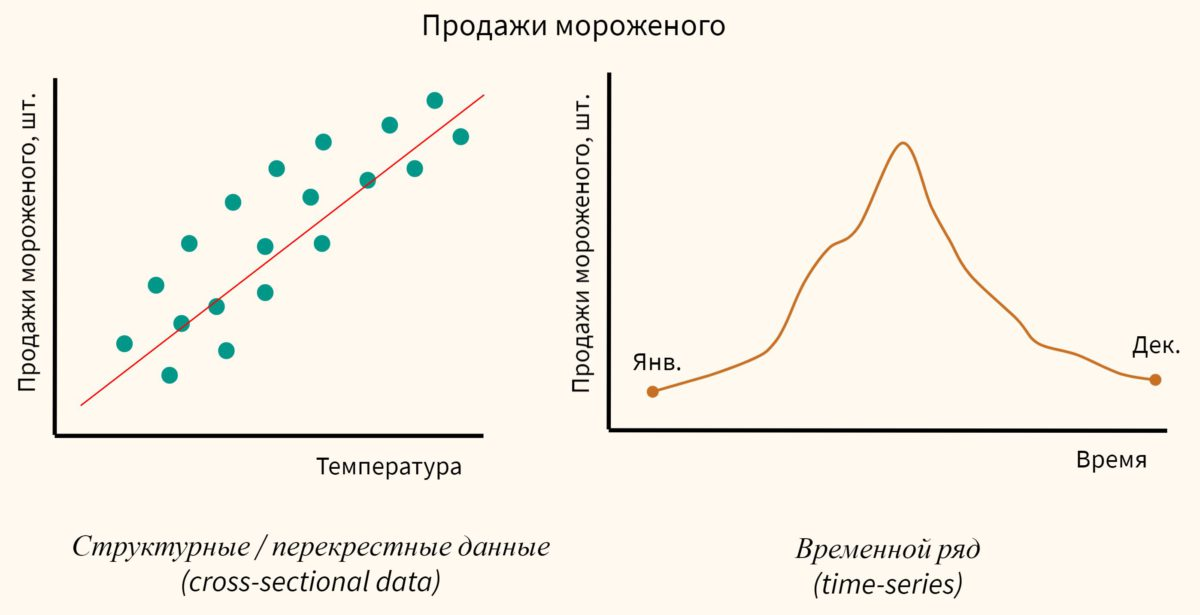

```Основное отличие: перекрестные данные предполагают независимость наблюдений, во временных рядах будущее зависит от прошлого.```

Работа с временными рядами предполагает два аспекта:
1. Анализ временного ряда (time series analysis), т.е. понимание его структуры и закономерностей;
2. Моделирование и построение прогноза на будущее (time series forecasting)

Договоримся о терминах:
- Во-первых, определим нотацию периодов. Временем t обозначим настоящее, t−1, t−2,… прошлое, t+1, t+2,… будущее.
- Во-вторых, введем важное понятие временного лага (lag), т.е. запаздывания по сравнению с заданным периодом.

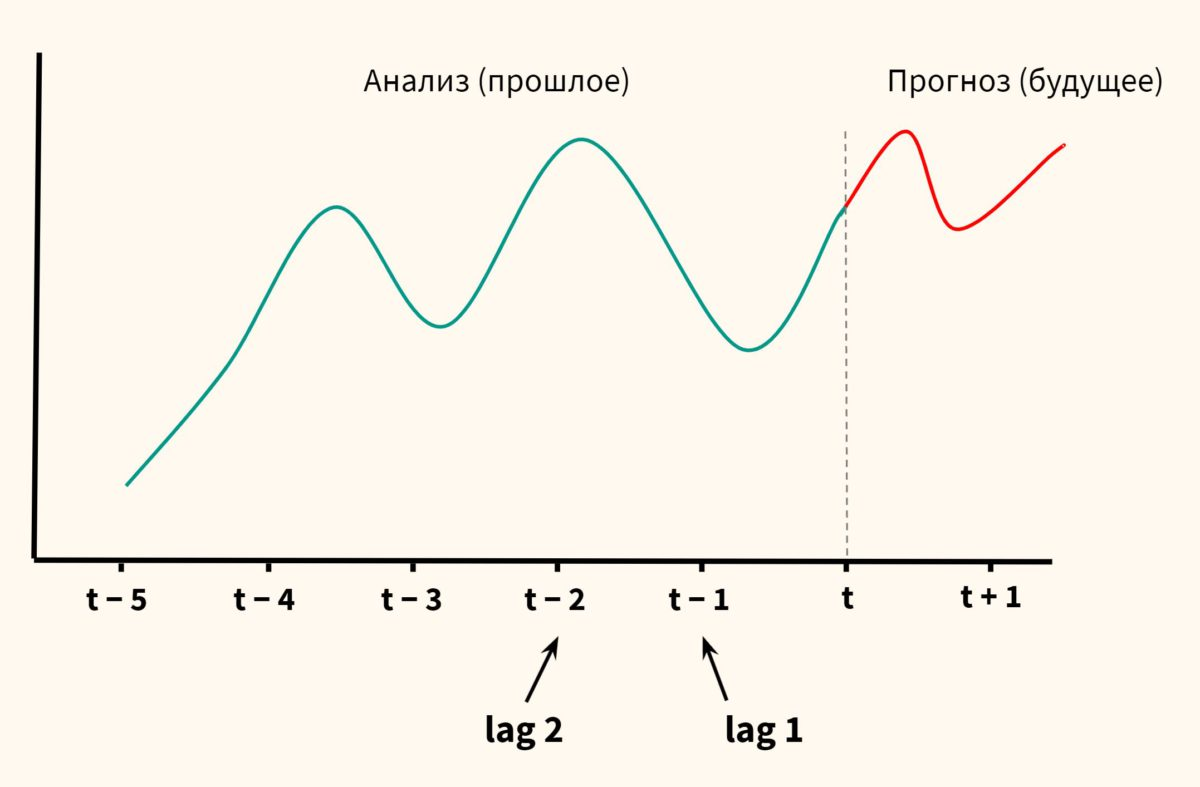

# Анализ временных рядов

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# импортируем файл с данными о пассажирах
passengers = pd.read_csv('passengers.csv', index_col='Month', parse_dates=True)
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Теперь мы можем делать срезы за определенный период, например, с августа 1949 по март 1950 года.

In [2]:
passengers['1949-08':'1950-03']

,#Passengers
Month,
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118
1950-01-01,115
1950-02-01,126
1950-03-01,141


## Изменение шага временного ряда, сдвиг и скользящее среднее

Отдельно хотелось бы поговорить про возможность обобщения и изменения данных. Помимо прочего, мы можем изменить шаг (resample) нашего временного ряда, и посмотреть средние показатели перевозок, например, за год.

In [3]:
passengers.resample(rule='YS').mean().head()

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


Кроме того, мы можем сдвинуть (shift) наши данные на n периодов вперед или назад.

In [4]:
# произведем сдвиг на два периода (в данном случае месяца) вперед
passengers.shift(2, axis = 0).head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


Что логично, после сдвига первые два значения определяются как пропущенные (NaN или Not a number).

Мы также можем рассчитать скользящее среднее (moving average, rolling average) за n предыдущих периодов. Вначале посмотрим, что это такое.

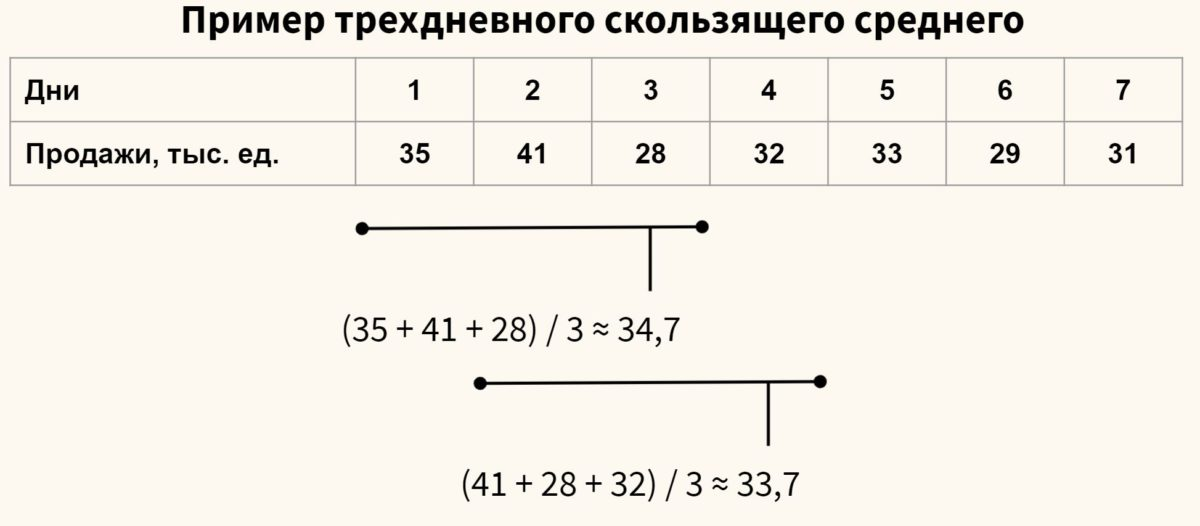

Теперь давайте рассчитаем его для наших данных. Период, за который рассчитывается скользящее среднее, также называется окном (window).

In [5]:
# рассчитаем скользящее среднее для трех месяцев
passengers.rolling(window = 3).mean().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333


Опять же, так как в данном случае мы использовали три месяца для расчета скользящего среднего, этот показатель недоступен для первых двух значений. В целом, скользящее среднее сглаживает временные показатели (мы это увидим на графике в следующем разделе).

## Построение графиков
Для того чтобы построить график временного ряда мы можем воспользоваться инструментами, которые уже содержатся в библиотеке Pandas. Например, простым методом .plot().

<Axes: xlabel='Month'>

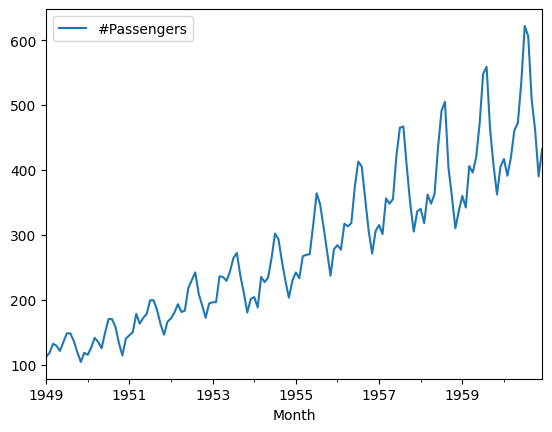

In [6]:
passengers.plot()

[Text(0.5, 1.0, 'Перевозки пассажиров с 1949 по 1960 год'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество пассажиров')]

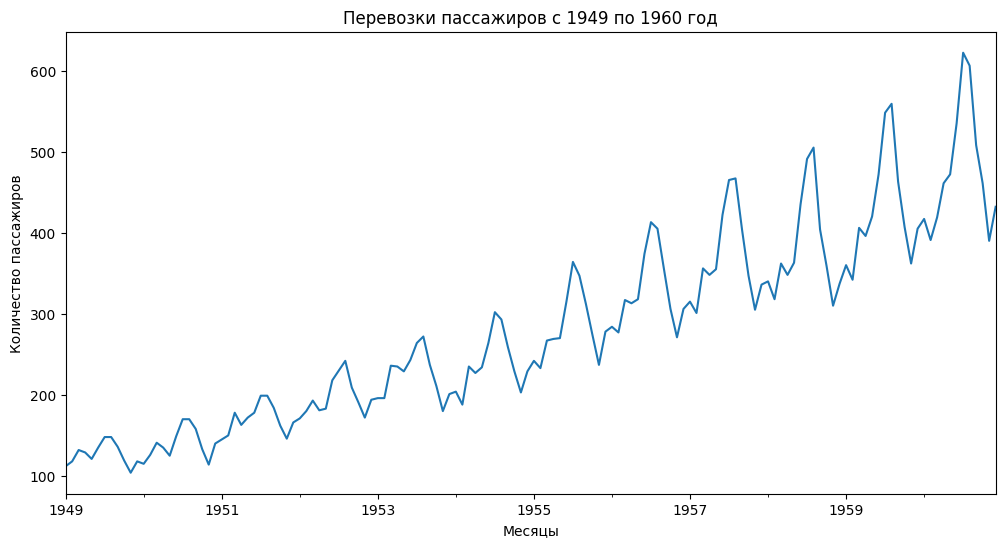

In [7]:
# изменим размер графика, уберем легенду и добавим подписи
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров')

Визуализацию можно также построить с помощью библиотеки Matplotlib. Давайте выведем на одном графике перевозки пассажиров и скользящее среднее.

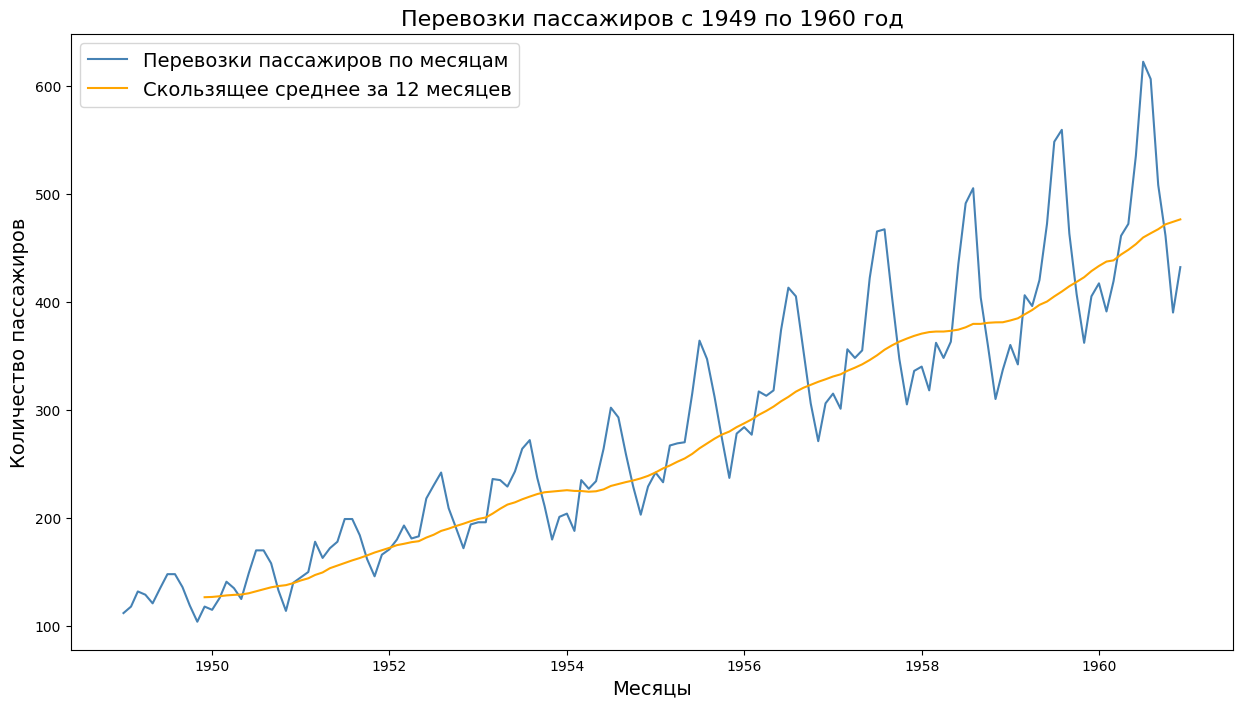

In [8]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

Как вы видите, скользящее среднее сильно сглаживает показатели. Также обратите внимание, что так как в данном случае мы взяли окно равное двенадцати месяцам, то первое значение скользящего среднего мы получили только за декабрь 1949 года (самое начало желтой кривой на графике).

```В целом не стоит недооценивать важность визуальной оценки ряда на графике. Многие особенности можно выявить именно так.```

## Разложение временного ряда на компоненты

Выявление компонентов временного ряда (time series decomposition) предполагает его разложение на тренд, сезонность и случайные колебания. Дадим несколько неформальных определений.

- Тренд — долгосрочное изменение уровня ряда
- Сезонность предполагает циклические изменения уровня ряда с постоянным периодом
- Случайные колебания — непрогнозируемое случайное изменение ряда
В Питоне в модуле statsmodels есть функция seasonal_decompose(). Воспользуемся ей для визуализации компонентов ряда.

Перед этим импортируем второй датасет для последующего сравнения.

In [9]:
# для наглядности импортируем второй датасет
# сразу превратим дату в индекс и преобразуем ее в объект datetime
births = pd.read_csv('births.csv', index_col = 'Date', parse_dates = True)
births.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


Теперь давайте разложим наш временной ряд по авиаперевозкам на компоненты.

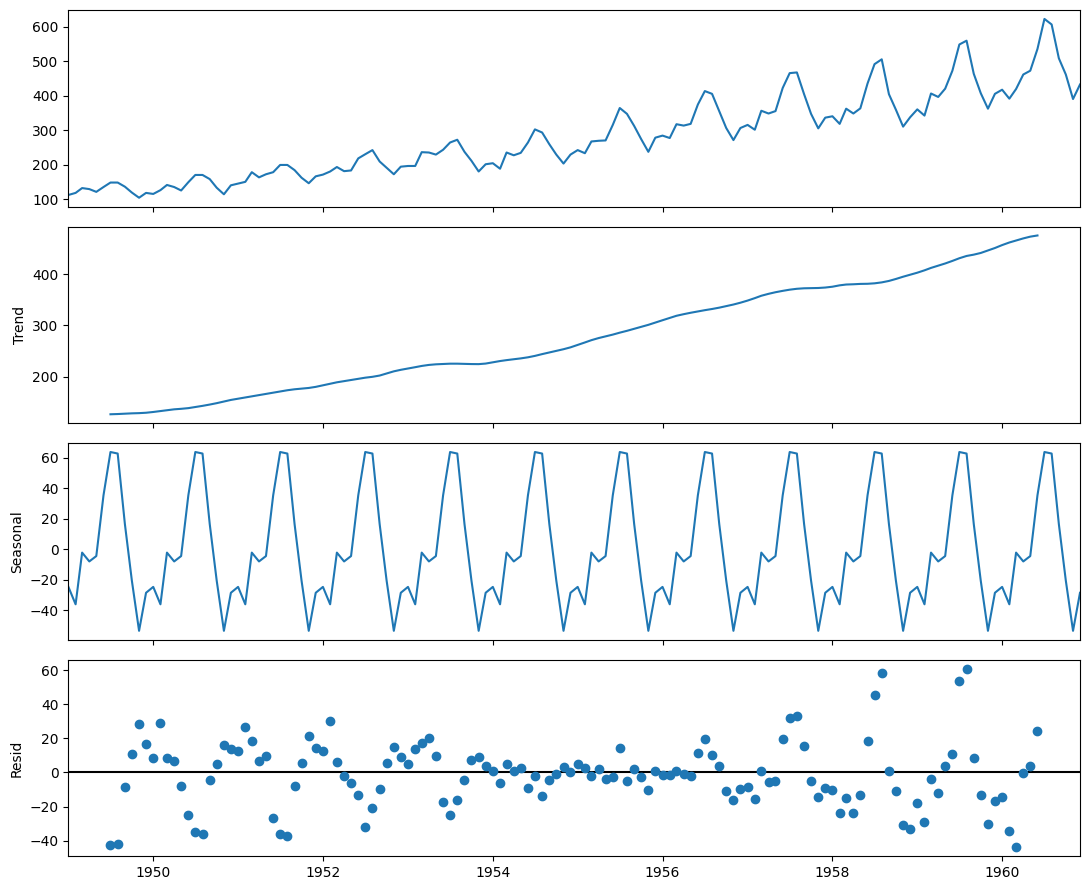

In [10]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(passengers)
decompose.plot()
 
plt.show()

Сделаем то же самое с данными о рождаемости.

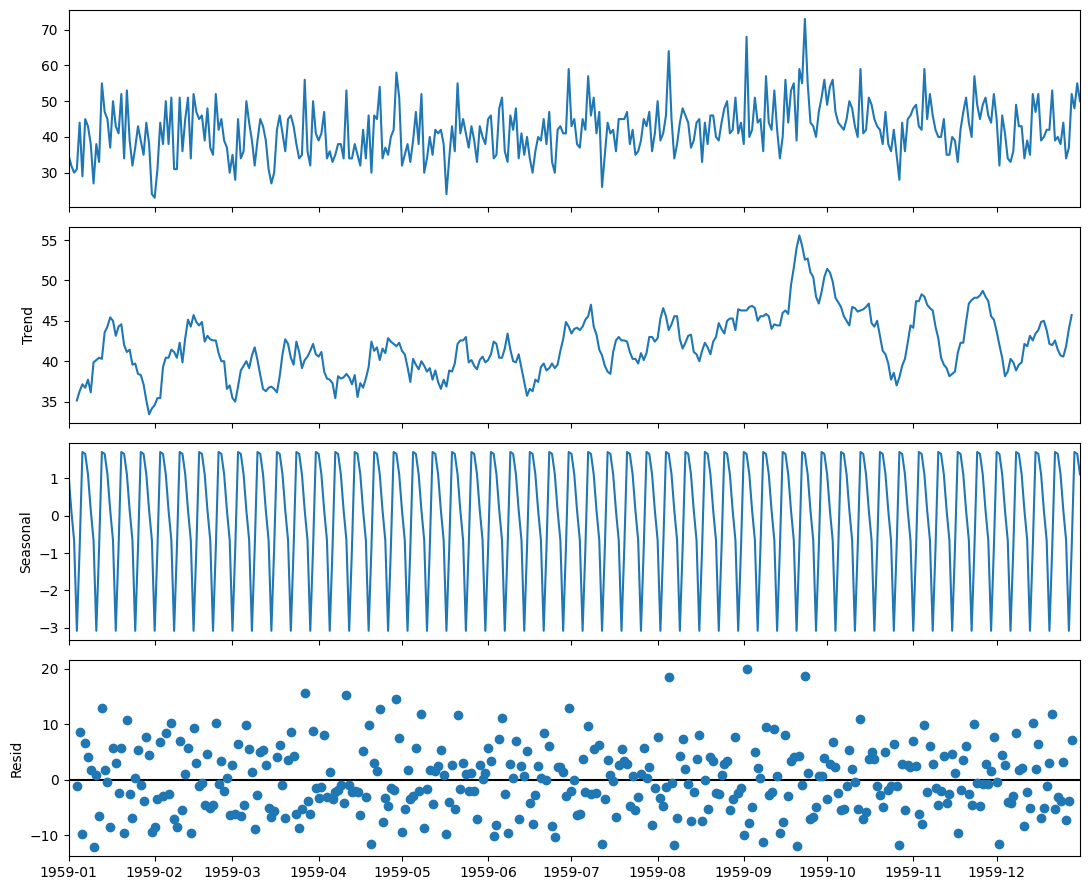

In [11]:
decompose = seasonal_decompose(births)
decompose.plot()
 
plt.show()

## Стационарность

Стационарность (stationarity) временного ряда как раз означает, что такие компоненты как тренд и сезонность отсутствуют. Говоря более точно, среднее значение и дисперсия не меняются со смещением во времени.

```Понимание того, стационарные ли у нас данные или нестационарные важно для последующего моделирования.```

Стационарность процесса можно **оценить визуально**. Датасет о перевозках демонстрирует очевидный тренд и сезонность, в то время как в наборе данных о рождаемости этого не видно (см. графики выше).

Для более точной оценки стационарности можно применить **тест Дики-Фуллера** (Dickey-Fuller test). О том, что такое статистический вывод мы с вами уже говорили.

В данном случае гипотезы звучат следующим образом.
- Нулевая гипотеза предполагает, что процесс нестационарный
- Альтернативная гипотеза соответственно говорит об обратном

Применим этот тест к обоим датасетам. Используем пороговое значение, равное 0,05 (5%).

In [12]:
# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(passengers['#Passengers'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


Как мы видим, вероятность (p-value) для данных о перевозках существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный. Проведем тест для второго набора данных.

In [13]:
# теперь посмотрим на данные о рождаемости
adf_test = adfuller(births['Births'])
 
# выведем p-value
print('p-value = ' +str(adf_test[1]))

p-value = 5.2434129901498554e-05


Результат существенно меньше 5%. Временной ряд стационарен.

Надо сказать, что наша визуальная оценка полностью совпала с математическими вычислениями.

## Автокорреляция

Корреляция показывает силу взаимосвязи двух переменных и позволяет строить модель.

Автокорреляция также показывает степень взаимосвязи в диапазоне от –1 до 1, но только не двух переменных, а одной и той же переменной в разные моменты времени.

Допустим, у нас есть временной ряд и этот же ряд, взятый с лагом 1, 2 и 3.

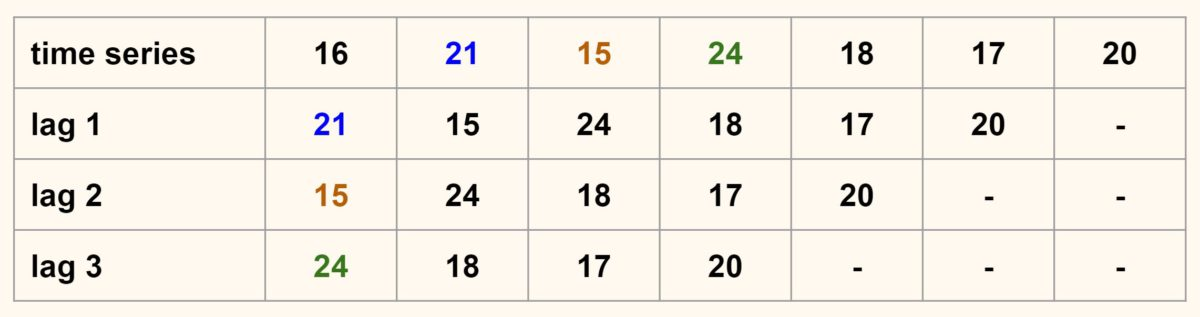

Мы можем посчитать автокорреляцию ряда с лагом 1.

In [14]:
# для начала возьмем искусственные данные
data = np.array([16, 21, 15, 24, 18, 17, 20])
 
# для сдвига на одно значение достаточно взять этот ряд, начиная со второго элемента
lag_1 = data[1:]
 
# посчитаем корреляцию для лага 1 (у исходных данных мы убрали последний элемент)
# так как мы получим корреляционную матрицу, возьмем первую строку и второй столбец [0, 1]
np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

np.float64(-0.71)

Аналогично мы можем посчитать корреляцию для лагов 2 и 3 и на самом деле любого другого лага. Такие измерения автокорреляции удобно вычислить и изобразить с помощью графика `автокорреляционной функции` (autocorrelation function, ACF).

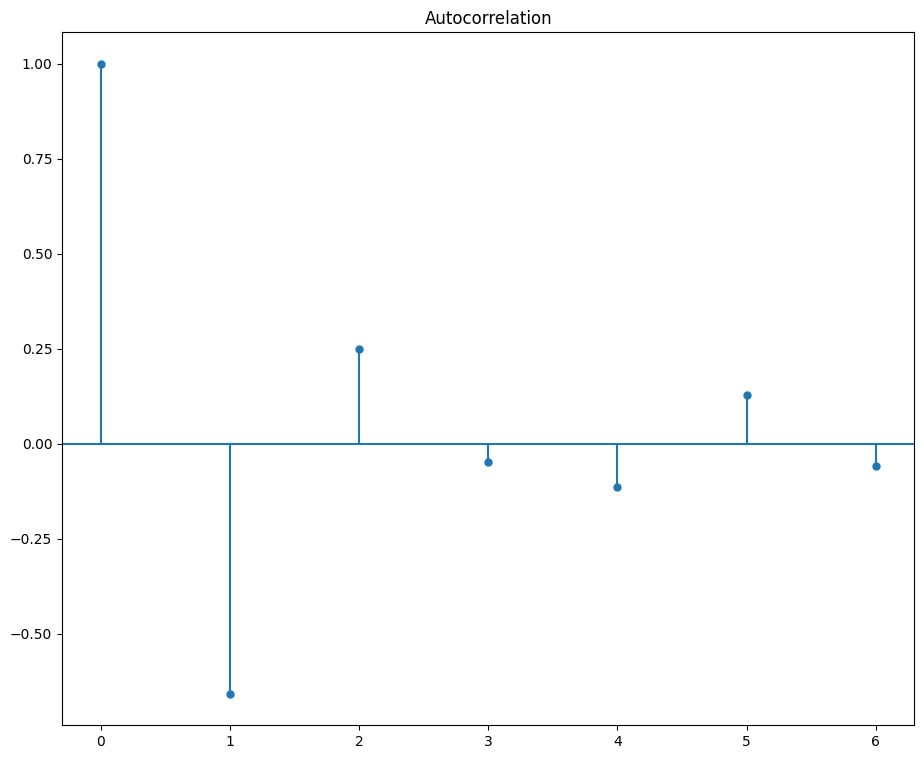

In [15]:
# импортируем автокорреляционную функцию (ACF)
from statsmodels.graphics.tsaplots import plot_acf
 
# применим функцию к нашему набору данных
plot_acf(data, lags = np.arange(len(data)), alpha = None)
 
# добавим отступы сверху и снизу на графике
plt.axis('tight')
plt.show()

В частности, мы видим, что автокорреляция ряда с самим собой (первый столбец) равна 1, что логично. Второй столбец (то есть лаг 1) как раз примерно равен – 0,71.

Разные значения, полученные через np.corrcoef() и plot_acf(), объясняются небольшим различием в заложенных в этих функциях формулах.

Теперь построим график ACF для наших данных о перевозках.

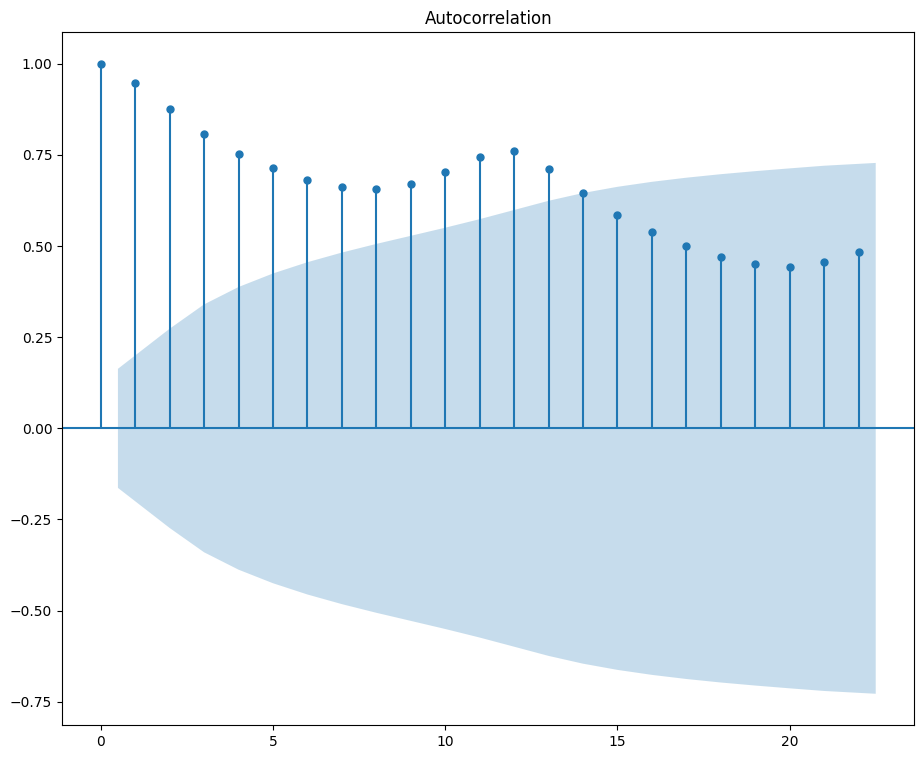

In [16]:
# применим ее к данным о пассажирах
plot_acf(passengers)
plt.axis('tight')
plt.show()

Автокорреляция позволяет выявлять тренд и сезонность, а также используется при подборе параметров моделей. В частности, мы видим, что лаг 12 сильнее коррелирует с исходным рядом, чем соседние лаги 10 и 11. То же самое можно сказать и про лаг 24. Такая автокорреляция позволяет предположить наличие (ежегодных) сезонных колебаний.

То, что корреляция постоянно положительная говорит о наличии тренда. Все это согласуется с тем, что мы узнали о данных, когда раскладывали их на компоненты.

Синяя граница позволяет оценить статистическую значимость корреляции. Если столбец выходит за ее пределы, то автокорреляция достаточно сильна и ее можно использовать при построении модели.

Сравним полученный выше график с графиком автокорреляционной функции данных о рождаемости.

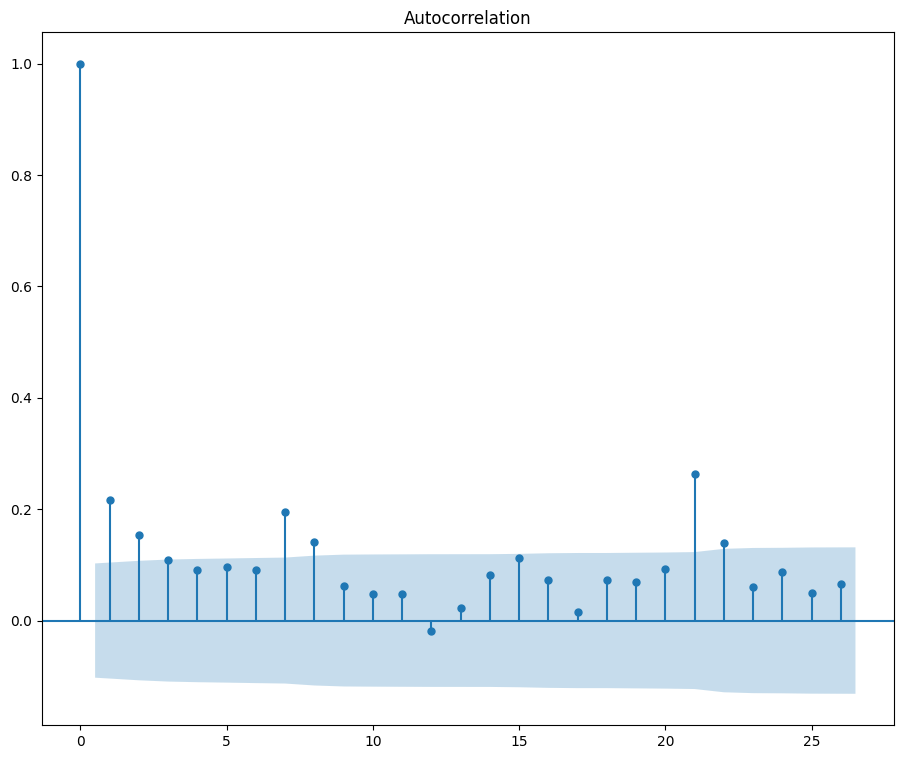

In [17]:
# построим аналогичный график для данных о рождаемости
plot_acf(births)
plt.axis('tight')
plt.show()

Во-первых, важно отметить, что автокорреляция в данном случае намного слабее. Во-вторых, мы не можем выявить четкой сезонности и тренда.

# Моделирование и построение прогноза

## Экспоненциальное сглаживание

Вновь обратимся к скользящему среднему (см. выше). В этой модели (1) всем предыдущим наблюдениям задавался одинаковый вес и (2) количество таких наблюдений было ограничено (мы называли это размером окна).

```Однако логично предположить, что недавние наблюдения более важны для прогноза, чем более отдаленные. Кроме того, мы можем взять все, а не некоторые из имеющихся у нас наблюдений.```

В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего мы как раз (1) берем все предыдущие значения и (2) задаем каждому из наблюдений определенный вес и (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.

$$y^-_{t+1} = \alpha * y_t + (1 - \alpha) * y^-$$

где $y^-_{t+1}$ это будущее прогнозное значение, 
 — $y_t$ истинное значение в текущий период, 
 — $y^-_t$ прогнозное значение в текущий период.

Как мы видим, будущее прогнозное значение зависит как от текущего истинного, так и от текущего прогнозного значений. Важность этих значений определяется параметром $\alpha$, который варьируется от 0 до 1. Чем $\alpha$ больше, тем больший вес у истинного наблюдения.

Формула рекурсивна, т.е. каждый раз мы умножаем $(1 - \alpha)$ на очередное прогнозное значение и так до конца временного ряда.



## Реализация модели эксп. сглаживания на практике

In [18]:
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [births['Births'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(births['Births'])):
  exp_smoothing.append(
      alpha * births['Births'][i] + (1 - alpha) * exp_smoothing[i - 1]
  )
 
# выведем прогнозное значение для 366-го дня (1 января 1960 года)
exp_smoothing[-1]

/tmp/ipykernel_8760/2518373957.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exp_smoothing = [births['Births'][0]]
/tmp/ipykernel_8760/2518373957.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha * births['Births'][i] + (1 - alpha) * exp_smoothing[i - 1]


np.float64(46.6051933602952)

Для временного ряда, состоящего из 365 наблюдений (весь 1959 год), мы получим 365 прогнозных значений (вплоть до 1 января 1960 года включительно).

In [19]:
len(births), len(exp_smoothing)

(365, 365)

Теперь добавим эти данные в исходный датафрейм births.

In [20]:
# добавим кривую сглаживаия в качестве столбца в датафрейм
births['Exp_smoothing'] = exp_smoothing
births.tail(3)

,Births,Exp_smoothing
Date,,
1959-12-29,48,43.445615
1959-12-30,55,45.756492
1959-12-31,50,46.605193


Единственный нюанс, так как фактические значения описывают период с 1 января по 31 декабря 1959 года, а прогнозные со 2 января 1959 года по 1 января 1960, мы не можем просто их соединить. Второй столбец нужно сдвинуть на один день вперед.

In [21]:
# для этого импортируем класс timedelta
from datetime import timedelta
 
# возьмём последний индекс (31 декабря 1959 года)
last_date = births.iloc[[-1]].index
 
# # "прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date

DatetimeIndex(['1960-01-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [22]:
# добавим его в датафрейм
births = pd.concat([births, pd.DataFrame(index = last_date)])
 
# значения за этот день останутся пустыми
births.tail()

,Births,Exp_smoothing
Date,,
1959-12-28,52.0,42.307018
1959-12-29,48.0,43.445615
1959-12-30,55.0,45.756492
1959-12-31,50.0,46.605193
1960-01-01,NaN,NaN


Сдвинем второй столбец.

In [23]:
births['Exp_smoothing'] = births['Exp_smoothing'].shift(1)

In [24]:
# как и должно быть первое прогнозное значение совпадает с предыдущим фактическим
births.head()

,Births,Exp_smoothing
Date,,
1959-01-01,35.0,NaN
1959-01-02,32.0,35.000
1959-01-03,30.0,34.400
1959-01-04,31.0,33.520
1959-01-05,44.0,33.016


In [25]:
# и у нас есть прогноз на один день вперед
births.tail()

,Births,Exp_smoothing
Date,,
1959-12-28,52.0,39.883773
1959-12-29,48.0,42.307018
1959-12-30,55.0,43.445615
1959-12-31,50.0,45.756492
1960-01-01,NaN,46.605193


Проверим правильность расчетов, найдя последнее прогнозное значение по формуле выше.

$$y^-_{366} = 0.2 * y_{365} + 0.8 * y^-_{365} = 0.2 * 50 + 0.8 * 45.756492 = 46.6051936$$

Результаты совпадают. Теперь выведем фактические и прогнозные значения на графике.

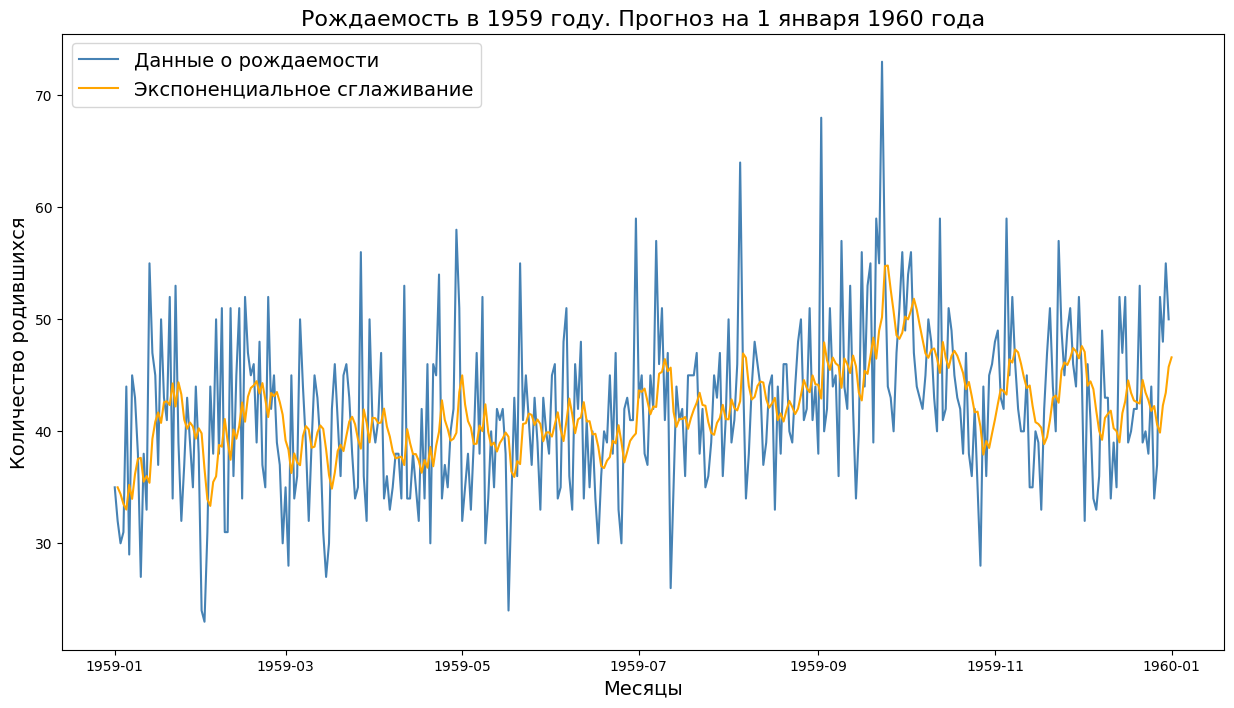

In [26]:
# зададим размер
plt.figure(figsize = (15,8))
 
# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(births['Births'], label = 'Данные о рождаемости', color = 'steelblue')
plt.plot(births['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.ylabel('Количество родившихся', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Рождаемость в 1959 году. Прогноз на 1 января 1960 года', fontsize = 16)
 
plt.show()

```В качестве упражнения можно попробовать построить график с несколькими значениями от 0 до 1.```

Модель экспоненциального сглаживания можно усложнить и тогда она будет улавливать тренд и сезонность. Кроме того, усложненные модели способны предсказывать более одного значения (обратите внимание, здесь мы смогли сделать прогноз лишь на один день вперёд).

# Модель ARMA

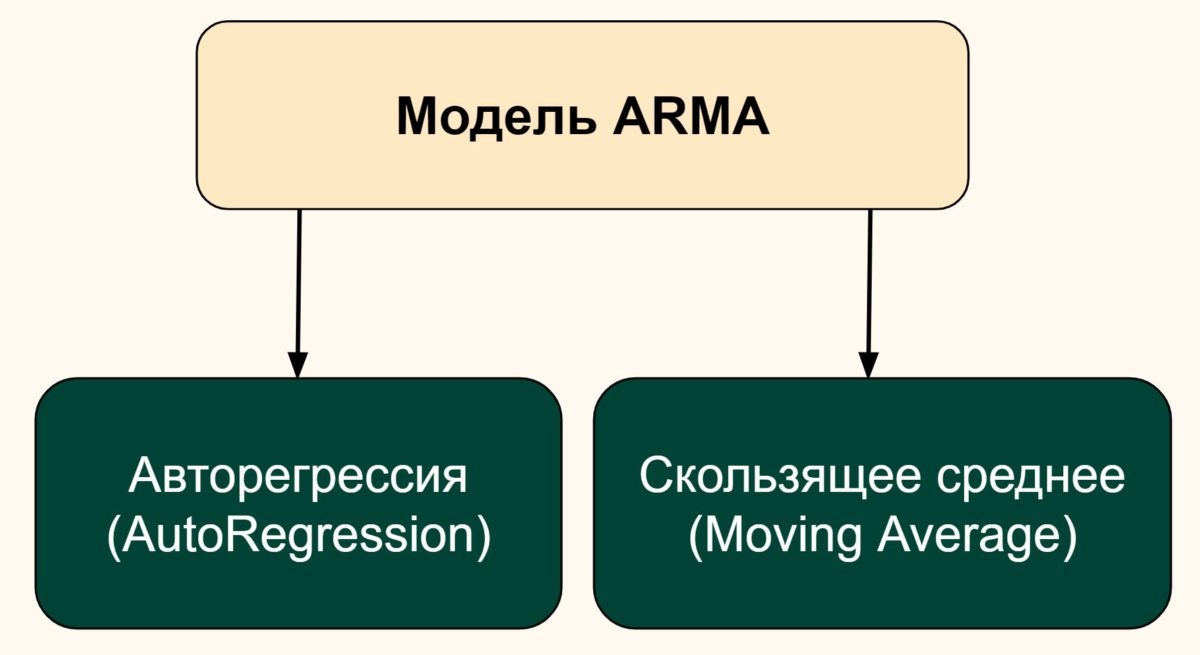

**Авторегрессия** (autoregressive model, AR) — это регрессия ряда на собственные значения в прошлом. Другими словами, наши признаки в модели обычной регрессии мы заменяем значениями той же переменной, но за предыдущие периоды.

Когда мы прогнозируем значение в период t с помощью данных за предыдущий период (AR(1)), уравнение будет выглядеть следующим образом.

$$y_t = c + \phi * y_{t-1}$$

Количество используемых предыдущих периодов определяется параметром p. Обычно записывается как AR(p).

**Модель скользящего среднего** (moving average, MA) помогает учесть случайные колебания или отклонения (ошибки) истинного значения от прогнозного. Можно также сказать, что модель скользящего среднего — это авторегрессия на ошибку.

```Обратите внимание, что скользящее среднее временного ряда, которое мы рассмотрели выше, и модель скользящего среднего — это разные понятия.```

Если использовать ошибку только предыдущего наблюдения, то уравнение будет выглядеть следующим образом.

$$y_t = \upsilon + \phi * \epsilon_{t-1}$$

где $\upsilon$ — это среднее значение временного ряда,  $\phi$ — вес модели,  $\epsilon_{t-1}$ — ошибка в период $t - 1$.

Такую модель принято называть моделью скользящего среднего с параметром q = 1 или MA(1). Разумеется, параметр q может принимать и другие значения (MA(q)).

```Модель ARMA с параметрами (или как еще говорят порядками, orders) p и q или ARMA(p, q) позволяет описать любой стационарный временной ряд.```

ARMA предполагает, что в данных отсутствует тренд и сезонность (данные стационарны). Если данные нестационарны, нужно использовать более сложные версии этих моделей:

- **ARIMA**, здесь добавляется компонент Integrated (I), который отвечает за удаление тренда (сам процесс называется дифференцированием);
- **SARIMA**, эта модель учитывает сезонность (Seasonality, S)
- **SARIMAX** включает еще и внешние или экзогенные факторы (eXogenous factors, отсюда и буква X в названии), которые напрямую не учитываются моделью, но влияют на нее.

Параметров у модели SARIMAX больше. Их полная версия выглядит как SARIMAX(p, d, q) x (P, D, Q, s). В данном случае, помимо известных параметров p и q, у нас появляется параметр d, отвечающий за тренд, а также набор параметров (P, D, Q, s), отвечающих за сезонность.

Теперь давайте воспользуемся моделью SARIMAX для прогнозирования авиаперевозок.

## Реализация модели SARIMAX на практике

В первую очередь нужно разбить данные на обучающую и тестовую выборки. Как мы помним, у нас есть данные с января 1949 года по декабрь 1960 года.

In [27]:
# обучающая выборка будет включать данные до декабря 1959 года включительно
train = passengers[:'1959-12']
 
# тестовая выборка начнется с января 1960 года (по сути, один год)
test = passengers['1960-01':]

Посмотрим на разделение на графике.

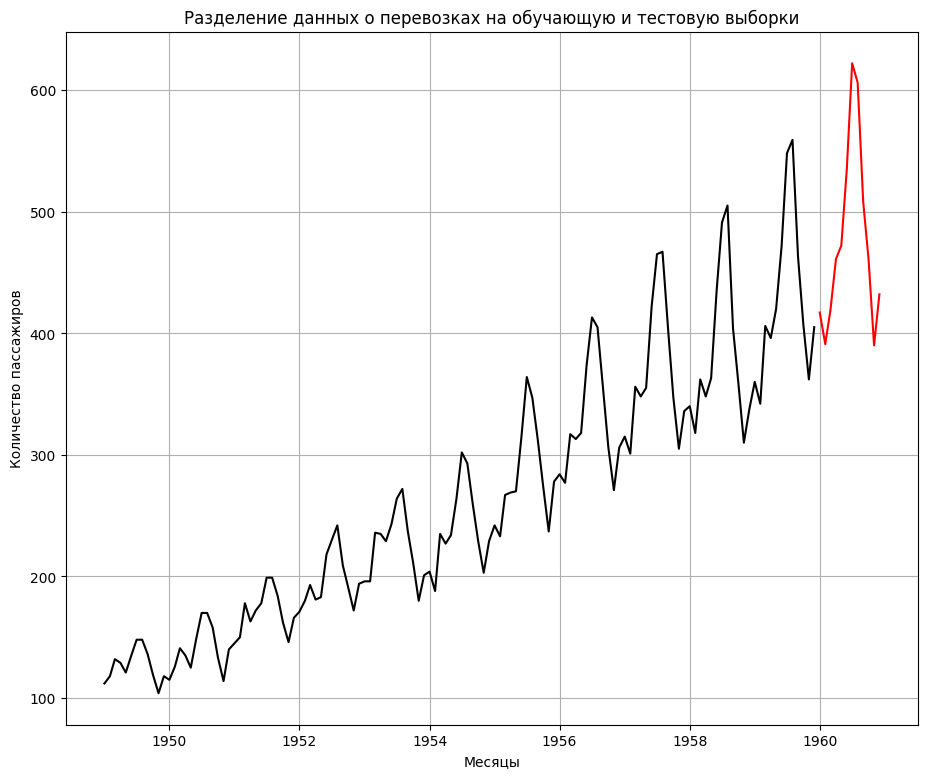

In [28]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

Далее нам нужно обучить модель. При обучении модели SARIMAX, самое важное — правильно подобрать гиперпараметры, о которых говорилось выше. Процесс подбора гиперпараметров достаточно сложен, и сегодня мы воспользуемся уже готовыми значениями.

In [29]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
 
# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# создадим объект этой модели
model = SARIMAX(train, order = (3, 0, 0), seasonal_order = (0, 1, 0, 12))
 
# применим метод fit
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42479D+00    |proj g|=  3.63776D-03

At iterate    5    f=  3.42452D+00    |proj g|=  8.58521D-03

At iterate   10    f=  3.42416D+00    |proj g|=  9.72822D-03

At iterate   15    f=  3.42389D+00    |proj g|=  4.95506D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   4.955D-06   3.424D+00
  F =   3.4238882841138847     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Теперь мы готовы делать прогноз. Вначале сделаем тестовый прогноз, соответствующий периоду тестовой выборки (1960 год), для того, чтобы оценить качество работы модели.

In [30]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
predictions = result.predict(start, end)
predictions

1960-01-01    422.703385
1960-02-01    404.947178
1960-03-01    466.293258
1960-04-01    454.781296
1960-05-01    476.848628
1960-06-01    527.162826
1960-07-01    601.449809
1960-08-01    610.821691
1960-09-01    513.229987
1960-10-01    455.692619
1960-11-01    409.200047
1960-12-01    450.754161
Freq: MS, Name: predicted_mean, dtype: float64

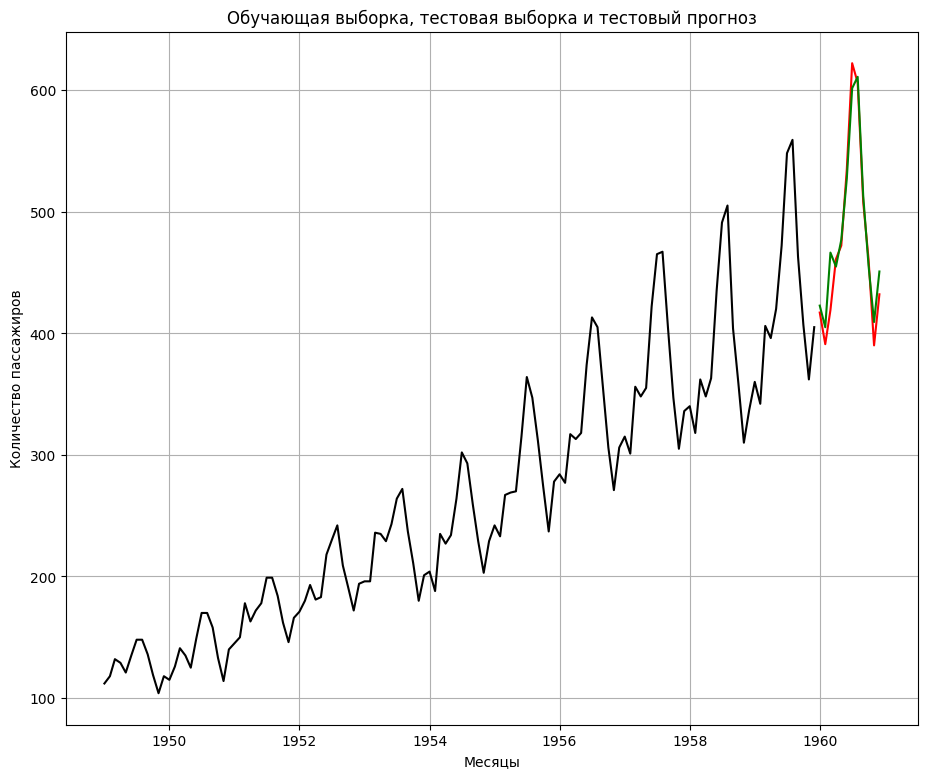

In [31]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

В целом модель хорошо описывает временной ряд. Мы также можем использовать знакомые нам метрики среднеквадратической ошибки (MSE) и корня среднеквадратической ошибки (RMSE) для оценки качества.

In [32]:
# импортируем метрику
from sklearn.metrics import mean_squared_error
 
# рассчитаем MSE
print(f'MSE = {mean_squared_error(test, predictions)}')
 
# и RMSE
print(f'RMSE = {np.sqrt(mean_squared_error(test, predictions))}')

MSE = 317.39565432961956
RMSE = 17.81560143047715


Теперь можно делать прогноз на будущее. Возьмём горизонт равный трем годам (1961, 1962 и 1963 год). Всего должно получиться 36 прогнозных значений.

In [33]:
# прогнозный период с конца имеющихся данных
start = len(passengers)
 
# и закончится 36 месяцев спустя
end = (len(passengers) - 1) + 3 * 12
 
# теперь построим прогноз на три года вперед
forecast = result.predict(start, end)
 
# посмотрим на весь 1963 год
forecast[-12:]

1963-01-01    518.603436
1963-02-01    497.908988
1963-03-01    556.406784
1963-04-01    542.133835
1963-05-01    561.524762
1963-06-01    609.244563
1963-07-01    681.016637
1963-08-01    687.950665
1963-09-01    587.995801
1963-10-01    528.167677
1963-11-01    479.454536
1963-12-01    518.856117
Freq: MS, Name: predicted_mean, dtype: float64

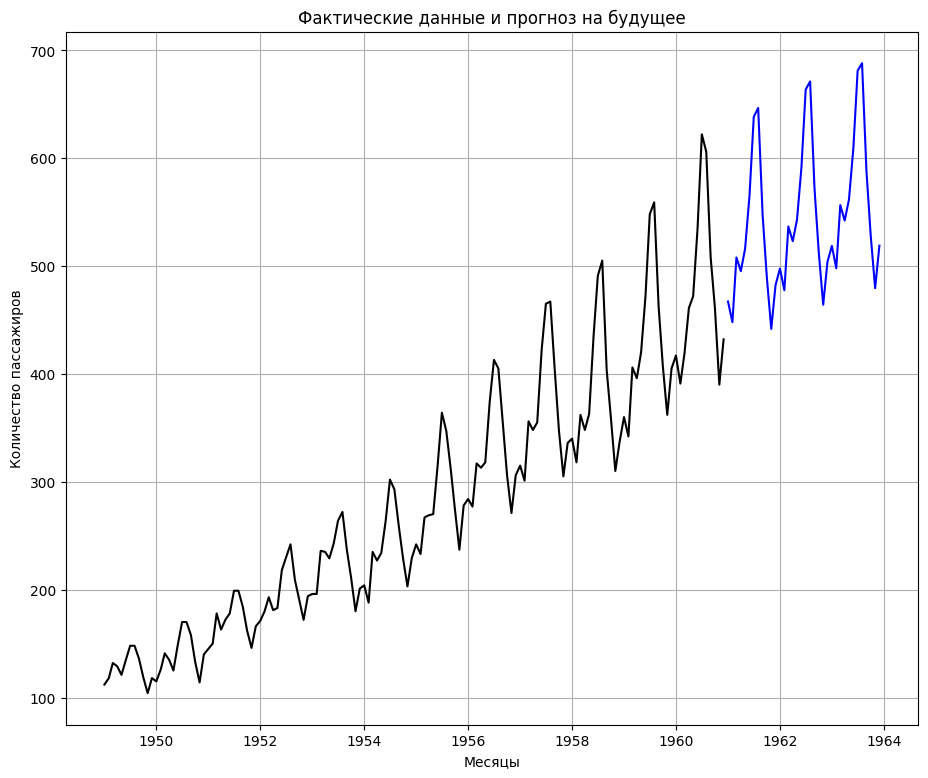

In [34]:
# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(passengers, color = 'black')
plt.plot(forecast, color = 'blue')
 
# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

# Bonus: Идеи, Где и Как применить в проектных задачах?

### BIOCAD
С помощью анализа временных рядов можно выявить тренды в научных исследованиях. И на основании трендов делать прогнозы.

### Книжный ассистент
Вести статистику о прочитанных книгах пользователей, на основе этого делать прогнозы и цели на следующие месяцы.